In [220]:
# Import required libraries

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [221]:
# Useful functions 

def plot(img1, img2, img3):
    f, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15,15))
    axis1.axis('off')
    axis2.axis('off')
    axis3.axis('off')
    axis1.imshow(img1, cmap='Greys_r')
    axis2.imshow(img2, cmap='Greys_r')
    axis3.imshow(img3, cmap='Greys_r')

Image dimensions are: (530, 1162, 3)


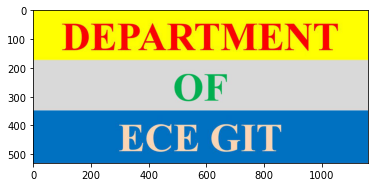

In [222]:
# Read & Display input image

ip_img = mpimg.imread('serb1.jpg')
print(f"Image dimensions are: {ip_img.shape}")
plt.imshow(ip_img)

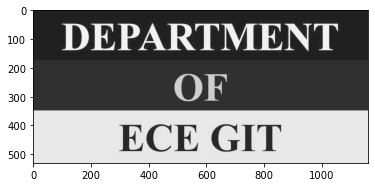

In [223]:
grey = cv2.cvtColor(ip_img, cv2.COLOR_RGB2GRAY)
plt.imshow(grey, cmap='Greys')

1
169
113


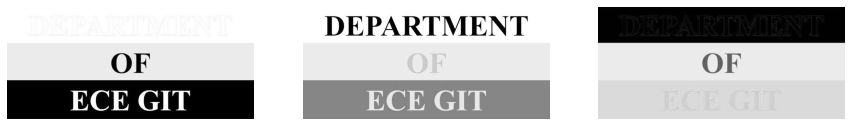

In [224]:
# RGB color space
r = ip_img[:,:,0]
g = ip_img[:,:,1]
b = ip_img[:,:,2]
print(g[50,600])
print(g[250,610])
print(g[450,50])
plot(r, g, b)

In [225]:
## Green channel looks better with better contrast (text visible in all three strips)

179
165
128


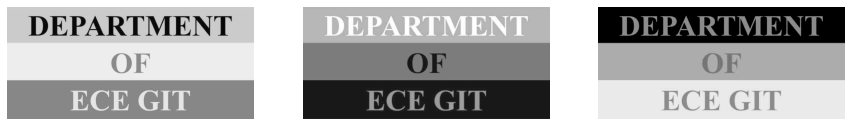

In [226]:
# yuv color space
yuv = cv2.cvtColor(ip_img,cv2.COLOR_BGR2YUV)

y = yuv[:,:,0]
u = yuv[:,:,1]
v = yuv[:,:,2]
print(y[50,50])
print(u[50,50])
print(v[250,50])
plot(y, u, v)

In [227]:
## All 3 channels provide good contast between text and backgroud

In [228]:
# Use Green or y or u channels for image processing

0


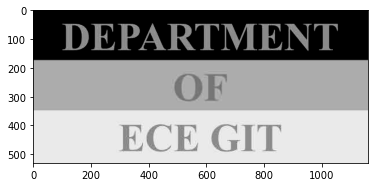

In [229]:
# Let's use v channel first
print(v[50,50])
plt.imshow(v, cmap='Greys_r')

255


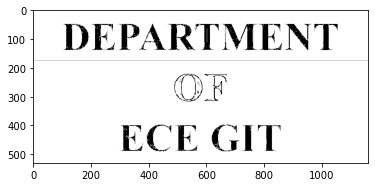

In [230]:
# Extract as much text possible
out = np.ones_like(v, dtype=np.uint8)*255
out[v > 116 ] = 0
out[v < 90 ] = 0
out = ~out
print(out[50,50])
plt.imshow(out, cmap='Greys_r')

255


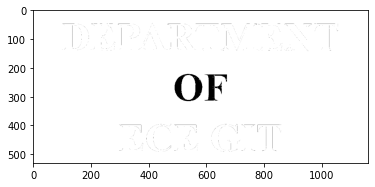

In [231]:
# Could not extract 'OF' properly so lets use g channel to extract 'OF'
out_g = np.ones_like(g, dtype=np.uint8)*255
out_g[g > 190 ] = 0
out_g[g < 150 ] = 0
out_g = ~out_g
print(out_g[50,50])
plt.imshow(out_g, cmap='Greys_r')

 ********** Final Output ********** 


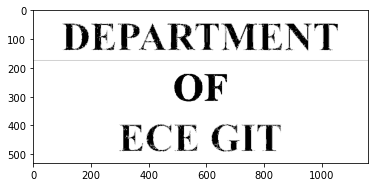

In [232]:
# Combine both images now
final = cv2.bitwise_and(out, out_g)
plt.imshow(final, cmap='Greys_r')
print(" ********** Final Output ********** ")

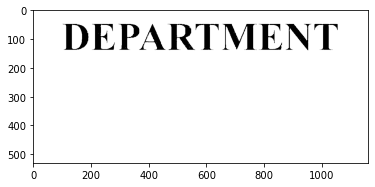

In [233]:
out_g1 = np.ones_like(g, dtype=np.uint8)*255
out_g1[g < 25 ] = 0
out_g1 = ~out_g1
plt.imshow(out_g1, cmap='Greys')

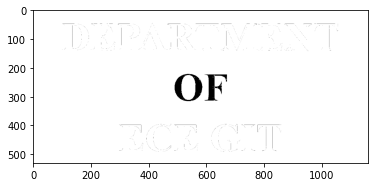

In [234]:
out_g2 = np.ones_like(g, dtype=np.uint8)*255
out_g2[g > 190 ] = 0
out_g2[g < 150 ] = 0
plt.imshow(out_g2, cmap='Greys')

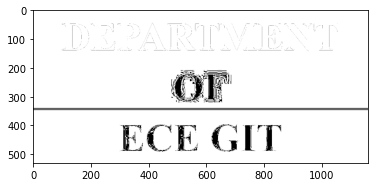

In [235]:
out_g3 = np.ones_like(g, dtype=np.uint8)*255
out_g3[g > 216 ] = 0
out_g3[g < 170 ] = 0
plt.imshow(out_g3, cmap='Greys')

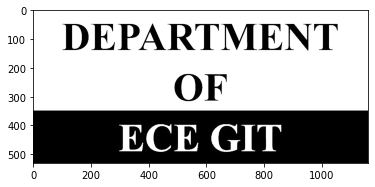

In [300]:
test = cv2.bitwise_and(r, g)
test [test > 128 ] = 255
plt.imshow(test, cmap='Greys_r')

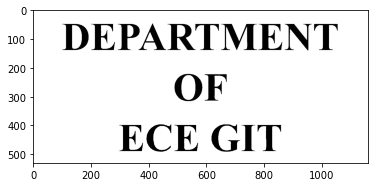

In [310]:
# create two masks selecting all white and all black pixels
test = cv2.bitwise_and(r, g)
test [test > 128 ] = 255

mask_ece_git = test > 128
mask_all_black = test <= 128    #### same as   mask_all_black = ~mask_ece_git

# de-select pixels in first two strips
y, x = test.shape
y_last_strip = int(y/3 * 2) - 5

mask_ece_git[0:y_last_strip,:] = 0
mask_all_black[0:y_last_strip,:] = 0

test[mask_ece_git] = 0
test[mask_all_black] = 255
plt.imshow(test, cmap='Greys_r')